In [1]:
from datetime import datetime as dt
import math
from string import Template

from IPython.display import display, YouTubeVideo, HTML, Image, Video
from IPython.core.interactiveshell import InteractiveShell

import numpy as np
import pandas as pd
from pandas.tseries.offsets import *
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import datasets

# supporting code in python modules
import expStd
import baseVizBld

%matplotlib inline
sns.set(style="darkgrid")
plt.style.use('ggplot') 

In [2]:
#%lsmagic
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/Anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "simple",
              "start_slideshow_at": "selected",
              "scroll":True,  
              "slideNumber":True,
              "transition":"slide",
              "progress":True
})

{'progress': True,
 'scroll': True,
 'slideNumber': True,
 'start_slideshow_at': 'selected',
 'theme': 'simple',
 'transition': 'slide'}

# Advanced Analytics
## A TEAM SPORT

<br>
<br>
<br>
<br>
<br>
Julia Romero         
AXA US       
Legacy Analytics

# Disclaimer
Placeholder for disclaimer text

# Reference Info
All data presented here is synthetic and has been generated using:
- the dataset generation tools in [scikit learn](http://scikit-learn.org/stable/datasets/index.html#) 
- functions and random number generators 

All code required to replicate the "results" presented is available in the presentation 

## Toolbox
Throughout the presentation I will include "toolbox" references highlighting the particular packages I'm using to do something. 

This entire presentation uses python, jupyter notebooks, and RISE

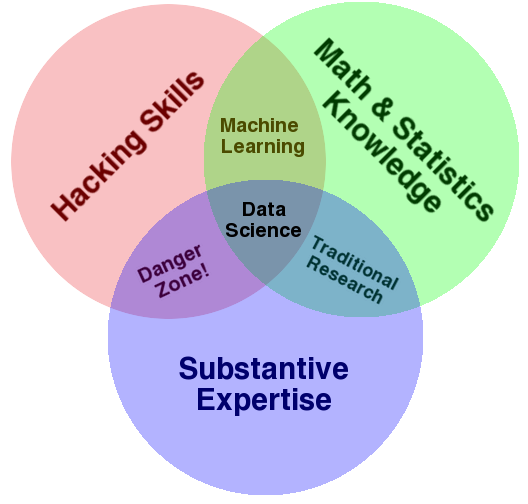

In [7]:
HTML( "<h1>That data science venn diagram ...</h1>")
Image("https://static1.squarespace.com/static/5150aec6e4b0e340ec52710a/t/51525c33e4b0b3e0d10f77ab/1364352052403/Data_Science_VD.png")

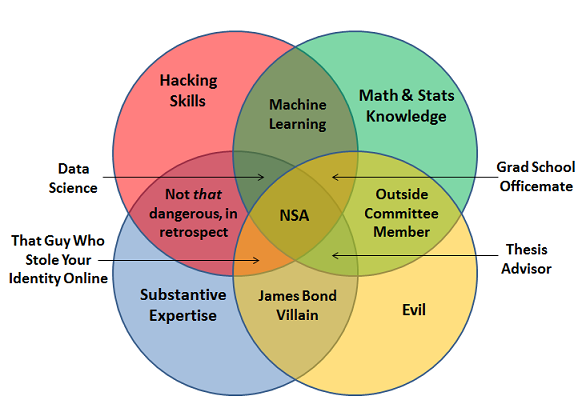

In [6]:
HTML("<h1>I like this one better</h1>")
Image("https://3.bp.blogspot.com/-bvQxcwfqATQ/V-E_uTBc4VI/AAAAAAAAMGQ/Qa1Ntef-rs0E-mWx5pkVu-CPlREdvD0TwCLcB/s1600/VennDiagram2.png")

In [7]:
HTML("<h1> ... so why are we here today?</h1><br>")

# Move from hype to can
**My goal today is for you to leave this room *knowing* that you can head back to your offices on Monday and with a few emails have an analytics project up and running**

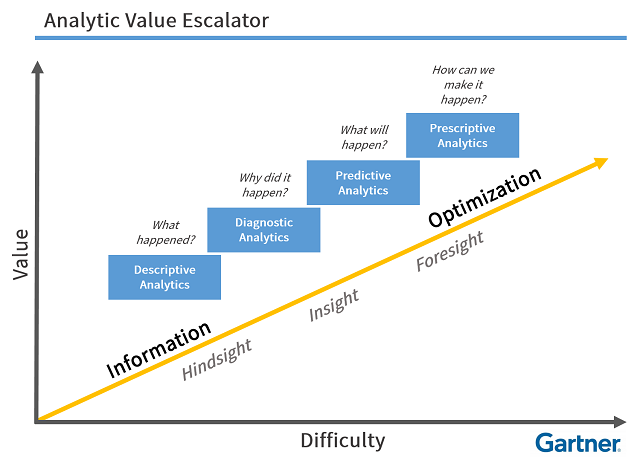

In [8]:
HTML("<h1>One more chart you've seen before</h1><br>")
Image("https://media.licdn.com/mpr/mpr/shrinknp_800_800/AAEAAQAAAAAAAAjIAAAAJGI0NzY3MGM0LTIyMTEtNDYwYy04OWQ2LTgyYmZiNDgzNTlhNw.png")

# Actuaries have been using advance analytics for a long time... we just called it experience

## Toolbox
- numpy
- pandas
- matplotlib

## How was the data made
Make a dataset that emulates lapse experience for a savings product with cash value and surrender charges
1. Specify generating functions 
2. Simulate synthetic population 
3. Simulate observations 

### Decrement function
$$ x = b_0 + b_1(YrsToChargeFree) + b_2(YrsToChargeFree)\times(AmtCharge) + \sigma$$
$$prob(dec) =\dfrac{e^{x}}{1+e^{x}}$$

### Synthetic population
Randomly specify:
1. class - {'A':0.20, 'B':0.35, 'C':0.15,'D':0.30}
   - A: 1 yrs
   - B: 4 yrs
   - C: 8 yrs
   - D: 10 yrs
2. account value [5000, 10000000]
3. yrs left 

Let
- $charge = \dfrac{yrsLeft}{(totalYrs \times 10)}$
- $amtCharg = accountValue \times charge$

### Simulate observations 
1. Specify b values
2. define function that calculates probability 
3. apply function to population
4. loop through population simulate decrement with random draw

In [4]:

def chargePlt(df, chrgYrs):
    ttl = Template('$n year charge')
    
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (16,10))
    fig.suptitle('Actual versus Expected Lapse Rates', fontsize = 16)
    ax1, ax2, ax3, ax4 = axes.ravel()
    
    ax1.set_title(ttl.substitute(n=chrgYrs[0]))
    line1, = ax1.plot(df.xs(chrgYrs[0],level='chrYrs').expected_lapseRate, ls='-', label = 'expected')
    line2, = ax1.plot(df.xs(chrgYrs[0],level='chrYrs').actual_lapseRate, ls='-', label = 'actual')
    ax1.legend(loc='upper right')
    
    ax2.set_title(ttl.substitute(n=chrgYrs[1]))
    line1, = ax2.plot(df.xs(chrgYrs[1],level='chrYrs').expected_lapseRate, ls='-', label = 'expected')
    line2, = ax2.plot(df.xs(chrgYrs[1],level='chrYrs').actual_lapseRate, ls='-', label = 'actual')
    ax2.legend(loc='upper right')
    
    ax3.set_title(ttl.substitute(n=chrgYrs[2]))
    line1, = ax3.plot(df.xs(chrgYrs[2],level='chrYrs').expected_lapseRate, ls='-', label = 'expected')
    line2, = ax3.plot(df.xs(chrgYrs[2],level='chrYrs').actual_lapseRate, ls='-', label = 'actual')
    ax3.legend(loc='upper right')
    
    ax4.set_title(ttl.substitute(n=chrgYrs[3]))
    line1, = ax4.plot(df.xs(chrgYrs[3],level='chrYrs').expected_lapseRate, ls='-', label = 'expected')
    line2, = ax4.plot(df.xs(chrgYrs[3],level='chrYrs').actual_lapseRate, ls='-', label = 'actual')
    ax4.legend(loc='upper right')
    

    ax1.set_xlabel('duration')
    ax2.set_xlabel('duration')
    ax3.set_xlabel('duration')
    ax4.set_xlabel('duration')
    
    ax1.set_ylabel('rate')
    ax2.set_ylabel('rate')
    ax3.set_ylabel('rate')
    ax4.set_ylabel('rate')
    
    plt.show()

In [5]:

# good fit - simulate directly against expected
synthExp_gf = expStd.process_synthExp(expStd.buildSynthPop(10000, 5000, 1000000, 1, 20,0))

# not good fit - add distortion to simulation 
synthExp_ngf = expStd.process_synthExp(expStd.buildSynthPop(10000, 5000, 1000000, 1, 20,0.1))

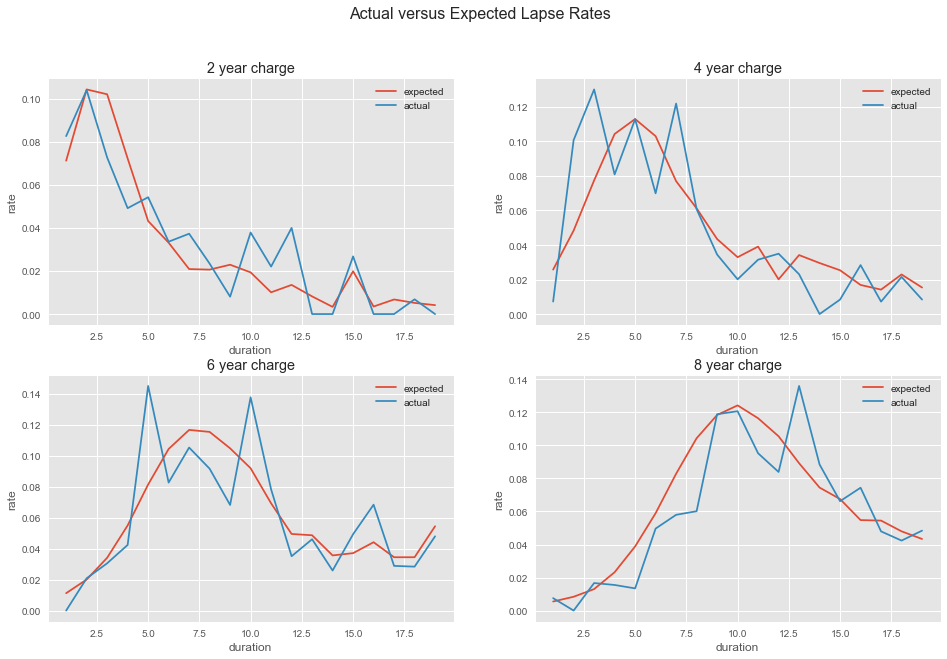

In [6]:
chargePlt(synthExp_gf, ['2','4','6','8']) 

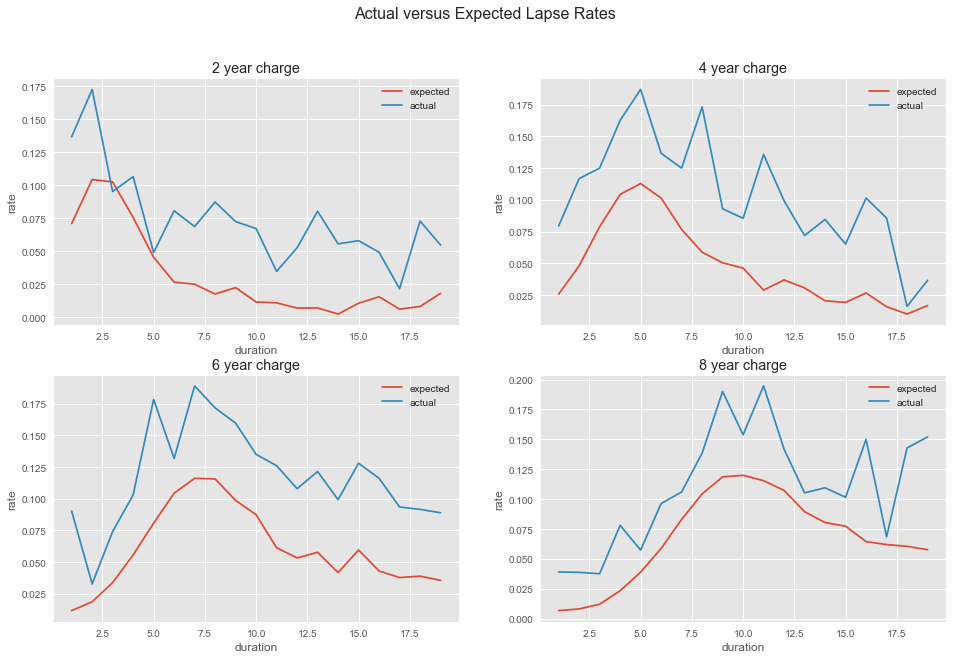

In [7]:
chargePlt(synthExp_ngf, ['2','4','6','8'])

In [8]:
# freeing some space
synthExp_gf = 0
synthExp_ngf = 0

### Experience studies are classic examples of *descriptive* analytics 

# OK fine, but how about something a bit more... 


In [9]:
vid = YouTubeVideo("93lrosBEW-Q", start=27, end =40, width = 1067, height = 600, autoplay=0)
display(vid)

## How to do more faster? Find some friends!

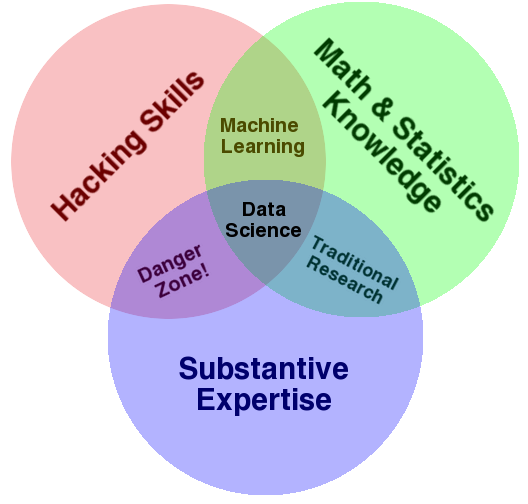

In [4]:
HTML("<h3>Remember our trusty old venn diagram</h3><br>")
Image("https://static1.squarespace.com/static/5150aec6e4b0e340ec52710a/t/51525c33e4b0b3e0d10f77ab/1364352052403/Data_Science_VD.png")
HTML("<h3>This can be a team</h3><br>")

# The actuary & the hacker 

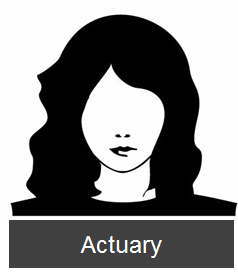

In [5]:
HTML("<h3>Actuaries understand product features and the drivers of risk and value</h3> <br>")
Image("images/julia_icon.png")

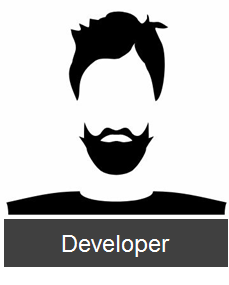

In [8]:
HTML("<h3> \"Hackers\" (we'll call them developers from now on) bring a new perspective on how to process and represent data </h3><br>")
Image("images/eric_icon.png")


## Code
Below is all the code used in the diagnosic analytics / visalization section of the presentation from generating the core datasets to generating the graphs

In [10]:
def buildFullPremPlt(df):
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize = (16,10))
    axes.set_title("Subsequent Contributions")
    axes.set_xlabel('date')
    axes.set_ylabel('policy')    
    return plt.plot_date(x = df.trxDt, y = df.polNo, marker = ',', color = 'green')

def buildIndPremPlt(df1, df2):
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize = (16,20))
    fig.suptitle('Contributions Split by Industry', fontsize = 16)

    ax1, ax2 = axes.ravel()   
    ax1.set_title("Education")
    ax2.set_title("Other")
    ax1.set_xlabel('date')
    ax2.set_xlabel('date')
    ax1.set_ylabel('policy')    
    ax2.set_ylabel('policy')    

    ax1.plot_date(x = df1.trxDt, y = df1.polNo, marker = ',', color = 'green')
    ax2.plot_date(x = df2.trxDt, y = df2.polNo, marker = ',', color = 'green')
    
    return fig, axes

def bldTypePlt(df, title, ax):
    ax.set_title(title)
    ax.set_xlabel('date')
    ax.set_ylabel('policy')
    
    ax.plot_date(x = df[df['premType']=='auto']['trxDt'], 
                  y = df[df['premType']=='auto']['polNo'], 
                  marker = ',', color = 'yellow', label = 'auto')
    ax.plot_date(x = df[df['premType']=='adhoc']['trxDt'], 
                  y = df[df['premType']=='adhoc']['polNo'], 
                  marker = ',', color = 'green', label = 'adhoc')
    ax.plot_date(x = df[df['premType']=='rollover']['trxDt'], 
                  y = df[df['premType']=='rollover']['polNo'], 
                  marker = ',', color = 'blue', label = 'rollover')
    ax.plot_date(x = df[df['premType']=='termination']['trxDt'], 
                  y = df[df['premType']=='termination']['polNo'], 
                  marker = ',', color = 'red', label = 'termination')
    ax.legend(loc='upper left')
    
    return ax
    
def bldIndTypePlt(df1, df2):
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize = (16,20))
    fig.suptitle('Contributions Split by Industry and Type', fontsize = 16)

    ax1, ax2 = axes.ravel()   
    
    ax1 = bldTypePlt(df1, "Education", ax1)
    ax2 = bldTypePlt(df2, "Other", ax2)
    return fig, axes

In [11]:
if(False):
    est = baseVizBld.buildRetPop(1500, pd.Timestamp('2002-01-01'),pd.Timestamp('2003-07-01'))
    trxes = baseVizBld.buildTrx(est)
    est.to_csv('data/premEx_pop.csv')
    trxes.to_csv('data/premEx_trx.csv')
else:
    est = pd.read_csv('data/premEx_pop.csv')
    trxes = pd.read_csv('data/premEx_trx.csv')

In [12]:
if(False):
    eduTrx = trxes.drop(trxes[trxes['educInd']==False].index, inplace = False)
    otherTrx = trxes.drop(trxes[trxes['educInd']==True].index, inplace = False)
else:
    eduTrx = trxes[trxes['educInd']==True]
    otherTrx = trxes[trxes['educInd']==False]

# Using visualizations to uncover truths about behavior 

## How does this relate to "advanced analytics"?

+ Visualization is the fastest way to communicate and understand large datasets
+ Human beings are hard wired to process images 

![xkcd](https://imgs.xkcd.com/comics/self_description.png)
(Credit: XKCD)

## Blending the skill sets of actuaries and developers allows us to generate novel and compelling visualizations 

+ Actuaries  
    - Critical understanding of product and policyholder behaviors and features
    - First hand knowledge of existing experience datasources and structures
+ Devleopers 
    - Ability to manage and transform large datasets
    - Provide new approaches and fresh perspectives 

## Toolbox
- numpy
- pandas
- matplotlib

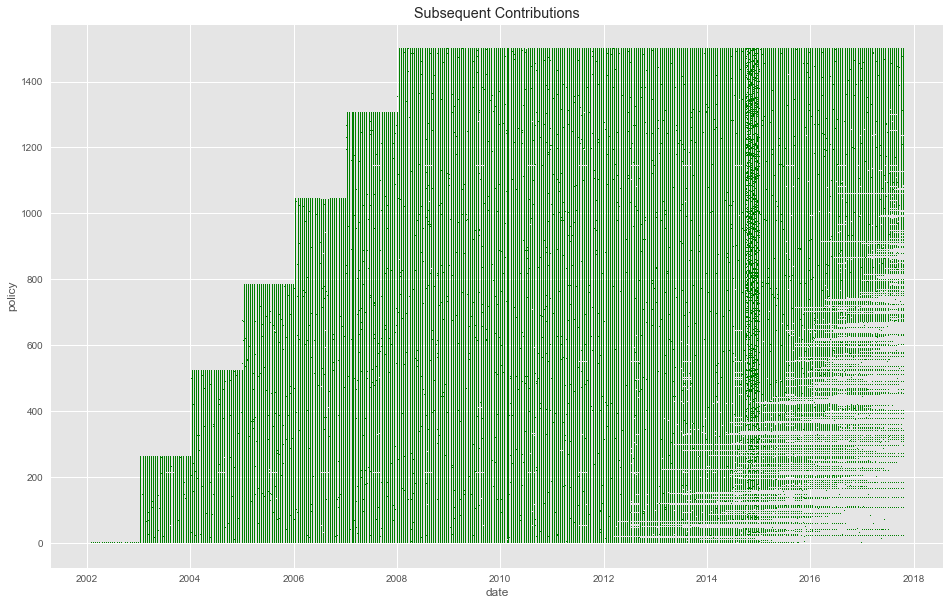

In [13]:
buildFullPremPlt(trxes)

### What do we learn from this
+ There are some patterns in the premiums
+ Also there is a bunch of premium at a point in time 
+ fairly long tenure but there are some outliers 

(<matplotlib.figure.Figure at 0xedf2828>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EDD8978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EE78DD8>], dtype=object))

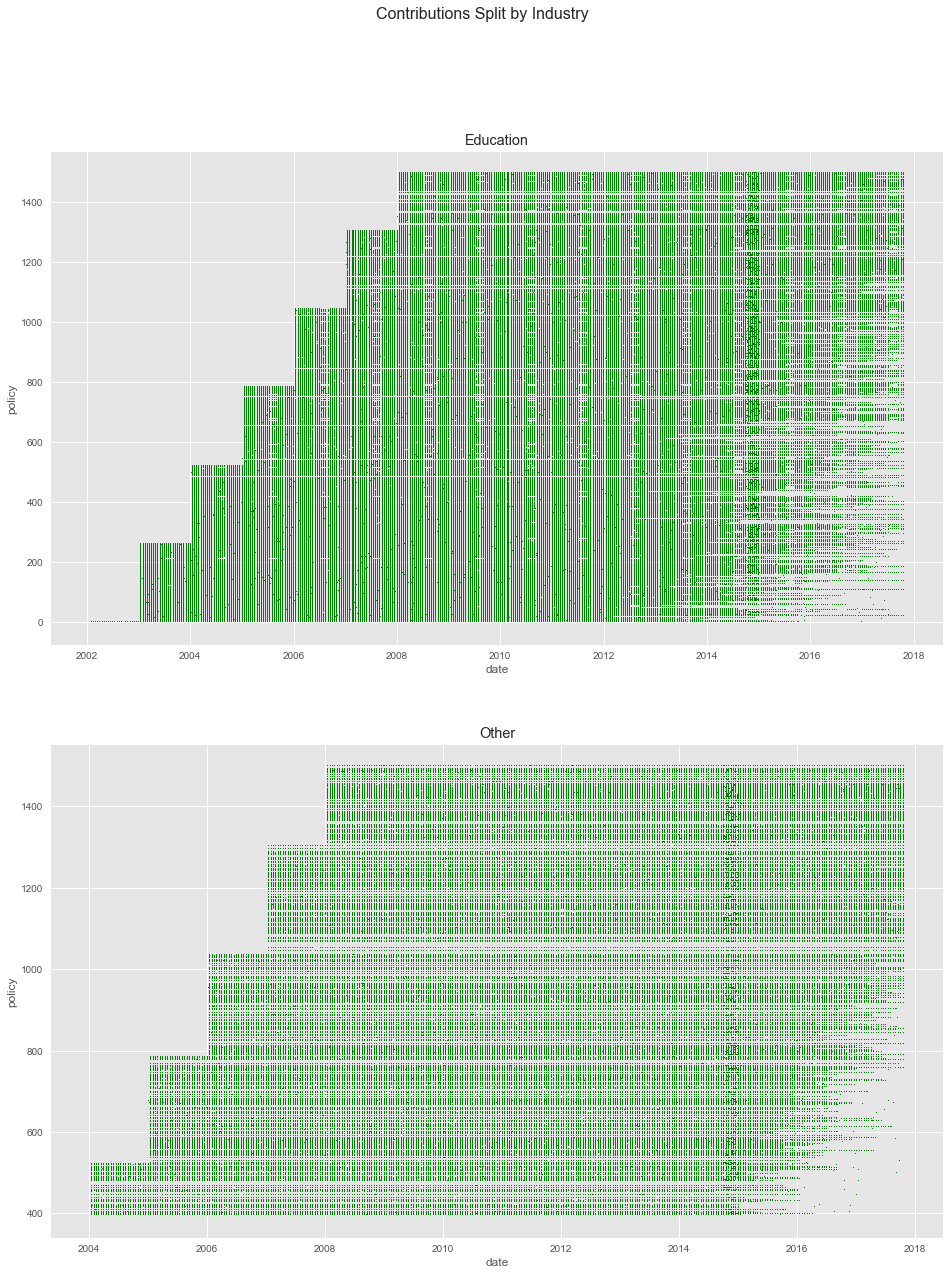

In [14]:
buildIndPremPlt(eduTrx, otherTrx)

### What do we learn from the split by industry 
- That weird pattern is only for education
- other doesnt go back as far as educ
- there are less of other
- tenure seems shorter 
- seems like there is some difference in the surge thing

(<matplotlib.figure.Figure at 0xefc2da0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF922E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DFA6F28>], dtype=object))

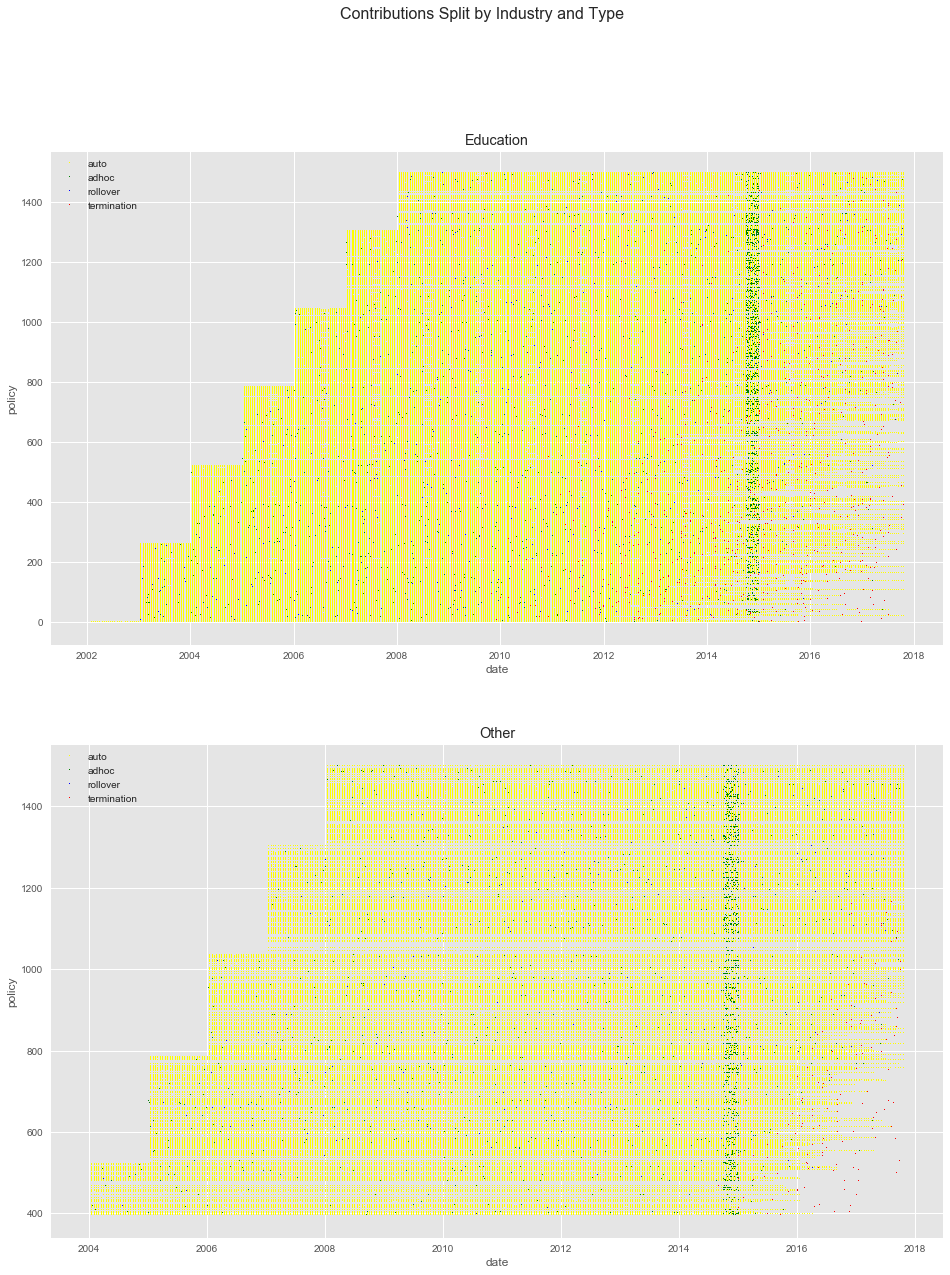

In [15]:
bldIndTypePlt(eduTrx,otherTrx)

In [16]:
trxes.groupby(['premType','educInd']).sum().unstack().style

In [103]:
trxes = 0
est = 0
eduTrx = 0
otherTrx = 0

# Predictive modeling

# With business context we can design and deploy predictive models that drive business value

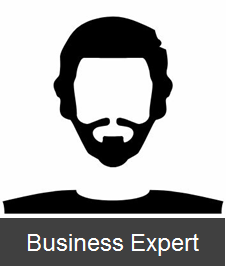

In [9]:
HTML("<h3>Adding a substantive expert in the business to your analytics team increases the team's ability to attack relevant business problems and provide on the ground actionable recomendations to end business users</h3>")
Image("images/rob_icon.png")

### Example: Expand life insurance sales in diabetes market

#### Business question: 
- Which potential clients have the best health / mortality outlooks? 
- Can we sell them life insurance?

#### Analytics questions:
- Can we use data to segment our potential client base to find areas where diabetes is "under control"?
- Can we predict applicants that will be better risks?

## Toolbox
- numpy
- pandas
- matplotlib
- sklearn

Model building functions go here; assume an additional timeseries dataset thats monthly has been created and that it has all the demographic info and the date of the last contribution of each type and that its called snapshots
1. train test
2. model selection / feature engineering 
3. model estimation
4. model testing
5. repeat - talk about this, but in the interest of time just pick the right model first TBC
6. results presentation - visualization

In [11]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

## First: Inspect the data

In [12]:
diabetes = datasets.load_diabetes()
cols = ['age','sex','bmi','avg_bp','s1','s2','s3','s4','s5','s6']
diabetes_df = pd.DataFrame(diabetes.data, columns = cols)
diabetes_df['disease_status_t1'] = diabetes.target

In [20]:
diabetes_df.tail()

,age,sex,bmi,avg_bp,s1,s2,s3,s4,s5,s6,disease_status_t1
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [21]:
diabetes_df.describe()

,age,sex,bmi,avg_bp,s1,s2,s3,s4,s5,s6,disease_status_t1
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


## Second: Prepare the data

In [13]:
def cat_Status(scr):
    if(scr < 151):
        return 'A'
    elif(scr < 251):
        return 'B'
    else:
        return 'C'

In [14]:
HTML("<h2>Feature Engineering</h2>")
diabetes_df['age_sex_cross'] = diabetes_df.age * diabetes_df.sex
diabetes_df['diseaseStatus_cat'] = diabetes_df.apply(lambda x: cat_Status(x.disease_status_t1), axis = 1)
diabetes_df.head(2)

,age,sex,bmi,avg_bp,s1,s2,s3,s4,s5,s6,disease_status_t1,age_sex_cross,diseaseStatus_cat
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0.001930,B
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0.000084,A


## Validation Prep: Train-test split

- Hold out sample
- Out of time sample

Splitting your data is important because 
1. test your model performance on fresh data - like if the practice questions were actually on the exam
2. overfitting - capture the specifics of a certain part of the data set but you cant generalize 

In [15]:
xdata = diabetes_df.drop(['disease_status_t1', 'diseaseStatus_cat'], axis =1)
ydata = diabetes_df[['disease_status_t1', 'diseaseStatus_cat']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.3, random_state = 0)

In [17]:
X_train.tail().style

,age,sex,bmi,avg_bp,s1,s2,s3,s4,s5,s6,age_sex_cross
323,0.0707688,0.0506801,-0.00728377,0.0494153,0.0603489,-0.00444536,-0.0544458,0.108111,0.129019,0.0569118,0.00358657
192,0.0562386,0.0506801,-0.0309956,0.00810087,0.0190703,0.0212328,0.0339135,-0.0394934,-0.0295276,-0.0590672,0.00285018
117,0.0598711,-0.0446416,-0.0212953,0.0872869,0.0452134,0.0315667,-0.0470825,0.07121,0.0791211,0.135612,-0.00267275
47,-0.0781653,-0.0446416,-0.0730303,-0.0573137,-0.0841261,-0.0742775,-0.0249927,-0.0394934,-0.0181183,-0.0839198,0.00348943
172,0.0417084,0.0506801,0.0713965,0.00810087,0.0383337,0.0159093,-0.0176294,0.0343089,0.0734101,0.0859065,0.00211379


# Third: Model Building
- Model and feature selection 
- Estimate model 

In [18]:
HTML("<h2>Correlation matrix</h2>")
diabetes_df.corr().style

,age,sex,bmi,avg_bp,s1,s2,s3,s4,s5,s6,disease_status_t1,age_sex_cross
age,1,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889,-0.0285763
sex,0.173737,1,0.0881614,0.241013,0.0352768,0.142637,-0.37909,0.332115,0.149918,0.208133,0.043062,0.0224381
bmi,0.185085,0.0881614,1,0.395415,0.249777,0.26117,-0.366811,0.413807,0.446159,0.38868,0.58645,-0.0605078
avg_bp,0.335427,0.241013,0.395415,1,0.24247,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484,-0.0725035
s1,0.260061,0.0352768,0.249777,0.24247,1,0.896663,0.0515194,0.542207,0.515501,0.325717,0.212022,-0.116381
s2,0.219243,0.142637,0.26117,0.185558,0.896663,1,-0.196455,0.659817,0.318353,0.2906,0.174054,-0.0753236
s3,-0.075181,-0.37909,-0.366811,-0.178761,0.0515194,-0.196455,1,-0.738493,-0.398577,-0.273697,-0.394789,-0.0392564
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1,0.617857,0.417212,0.430453,-0.0461077
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1,0.46467,0.565883,-0.0986936
s6,0.301731,0.208133,0.38868,0.390429,0.325717,0.2906,-0.273697,0.417212,0.46467,1,0.382483,-0.0825197


## Model Selection
Business objective: build a model that predicts future diabetes progress <br>
- *What is our target variable?*<br>
- *What type of model makes the most sense to predict the selected target?*


##### Think about the problem you're trying to solve!

Do we need the actual score or is just the category enough?

In [9]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
clf =  neighbors.KNeighborsClassifier(15, weights='uniform')


In [72]:
clf.fit(X_train[['s5','bmi','s4']], y_train['diseaseStatus_cat'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

# Fourth: Model Validation 
How did we do?

In [77]:
import itertools
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def buildConfusionMatrix(cm, classes, 
                         normalize = False,
                         title = 'Confusion Matrix',
                         cmap = plt.cm.Blues
                        ):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [74]:
class_names = ['A','B','C']
cm_train = confusion_matrix(y_train['diseaseStatus_cat'],clf.predict(X_train[['s5','bmi','s4']]))
cm_test = confusion_matrix(y_test['diseaseStatus_cat'],clf.predict(X_test[['s5','bmi','s4']]))
np.set_printoptions(precision=2)

Confusion matrix, without normalization


Confusion matrix, without normalization


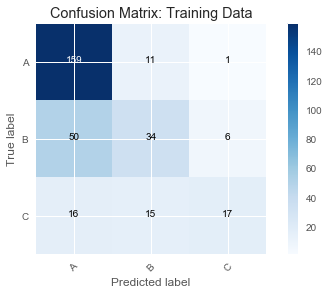

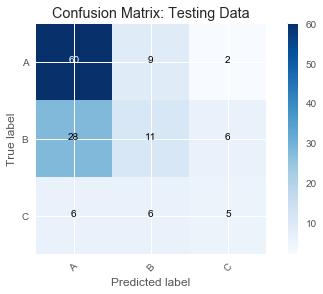

In [78]:
plt.figure()
buildConfusionMatrix(cm_train, classes = class_names, title = 'Confusion Matrix: Training Data')

plt.figure()
buildConfusionMatrix(cm_test, classes = class_names, title = 'Confusion Matrix: Testing Data')
    
plt.show()

In [101]:
from sklearn.metrics import precision_score, recall_score
'Precision: {0:%} Recall: {1:%}'.format(
    precision_score(y_test['diseaseStatus_cat'],clf.predict(X_test[['s5','bmi','s4']]), average = 'weighted'),
    recall_score(y_test['diseaseStatus_cat'],clf.predict(X_test[['s5','bmi','s4']]), average = 'weighted'))

'Precision: 53.305317% Recall: 57.142857%'

## Well ... not great

# The process is iterative!

- Explore different models
- Explore features
- Engineer new features
- Enrich your dataset

In [84]:
HTML("<h2>Lets add some additional predictors</h2>")
clf2 =  neighbors.KNeighborsClassifier(15, weights='uniform')
clf2.fit(X_train[['s5','bmi','s4','avg_bp']], y_train['diseaseStatus_cat'])

cm_train = confusion_matrix(y_train['diseaseStatus_cat'],clf2.predict(X_train[['s5','bmi','s4','avg_bp']]))
cm_test = confusion_matrix(y_test['diseaseStatus_cat'],clf2.predict(X_test[['s5','bmi','s4','avg_bp']]))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

Confusion matrix, without normalization


Confusion matrix, without normalization


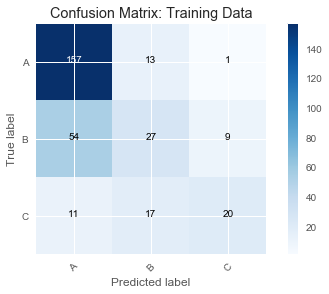

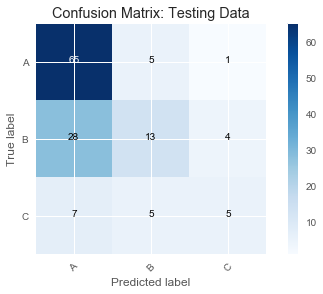

In [85]:
plt.figure()
buildConfusionMatrix(cm_train, classes = class_names, title = 'Confusion Matrix: Training Data')

plt.figure()
buildConfusionMatrix(cm_test, classes = class_names, title = 'Confusion Matrix: Testing Data')
    
plt.show()

In [102]:
from sklearn.metrics import precision_score, recall_score
'Precision: {0:%} Recall: {1:%}'.format(
    precision_score(y_test['diseaseStatus_cat'],clf2.predict(X_test[['s5','bmi','s4','avg_bp']]), average = 'weighted'),
    recall_score(y_test['diseaseStatus_cat'],clf2.predict(X_test[['s5','bmi','s4','avg_bp']]), average = 'weighted'))

'Precision: 60.214122% Recall: 62.406015%'

## Word of warning - explanatory variables are not free!

# Prescriptive analytics and beyond
Moving from answering "when will X happen?" to "how do we ** make ** X happen?"
<br>
- Agent based simulation models

## Agent Based Simulation Models (ABMs) 
- Example of prescriptive analytics
- Developed for biology, model of how individuals interact with each other and the system they live in
- Collection of causal models - population behavior is emergent

# What are ABMs?

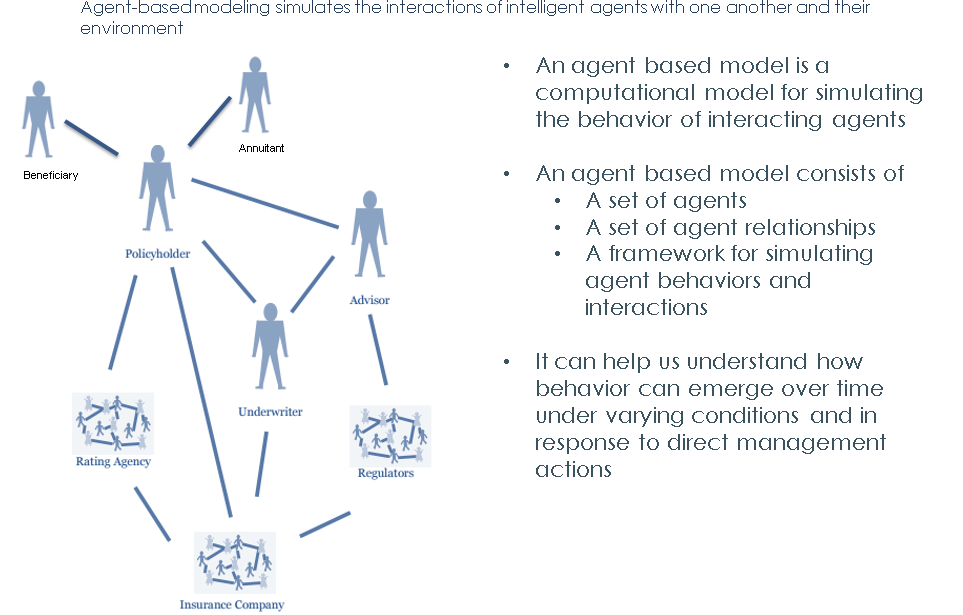

In [22]:
HTML("<h2>What is an ABM?</h2><br>")
Image("images/ABMs.png")

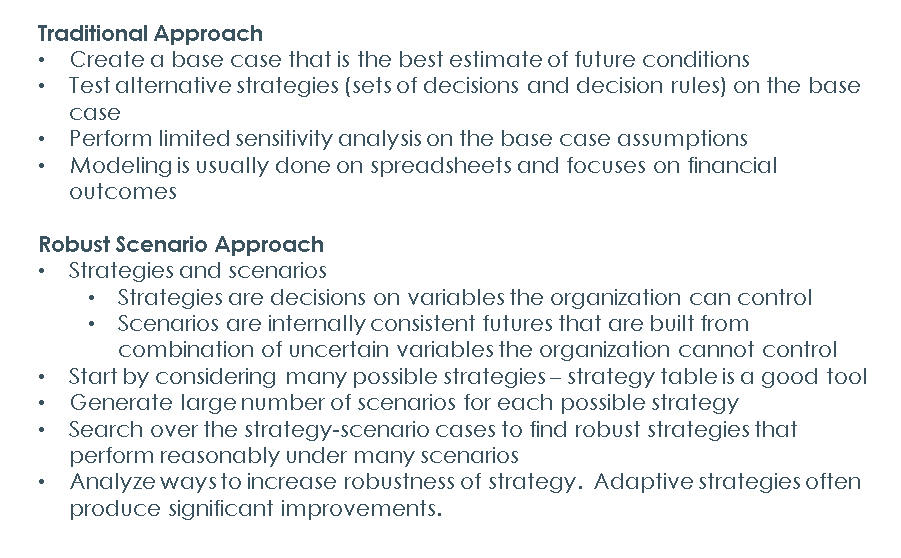

In [23]:
HTML("<h2> How do you use ABMs? </h2><br>")
Image("images/usingABMs.png")

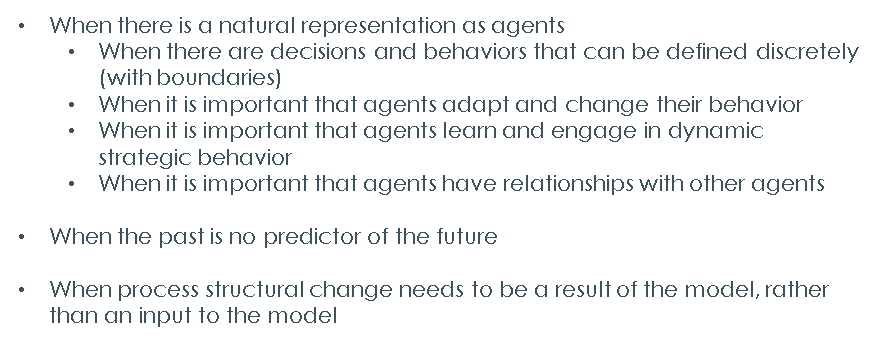

In [24]:
HTML("<h2>When should you use an ABM? </h2><br>")
Image("images/whenABM.png")

# <center>Thank you</center>